# Automated Ideation with ChatGPT and Stable Diffusion

Copyright 2023, Denis Rothman

This notebook implements an educational example of automated ideation beyon human designed prompts.

The automation requires no human intervention. It's a click-and-run process.

The notebook automatically creates an instruction for ChatGPT which in turn creates prompts that Stable Diffusion transformers into images.


In [1]:
#To access saved API keys
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!curl -L https://raw.githubusercontent.com/Denis2054/Transformers-for-NLP-and-Computer-Vision-3rd-Edition/main/Notebook%20images/20/chatgpt_stable_diffusion.jpg --output "chatgpt_stable_diffusion.jpg"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 67008  100 67008    0     0   156k      0 --:--:-- --:--:-- --:--:--  156k


## Automated Ideation Process

1.**The context document** is prepared
2.**ChatGPT**, GPT-4, generates text-to-image prompts     
3.**Stable Diffusion** generates images from automated prompts.


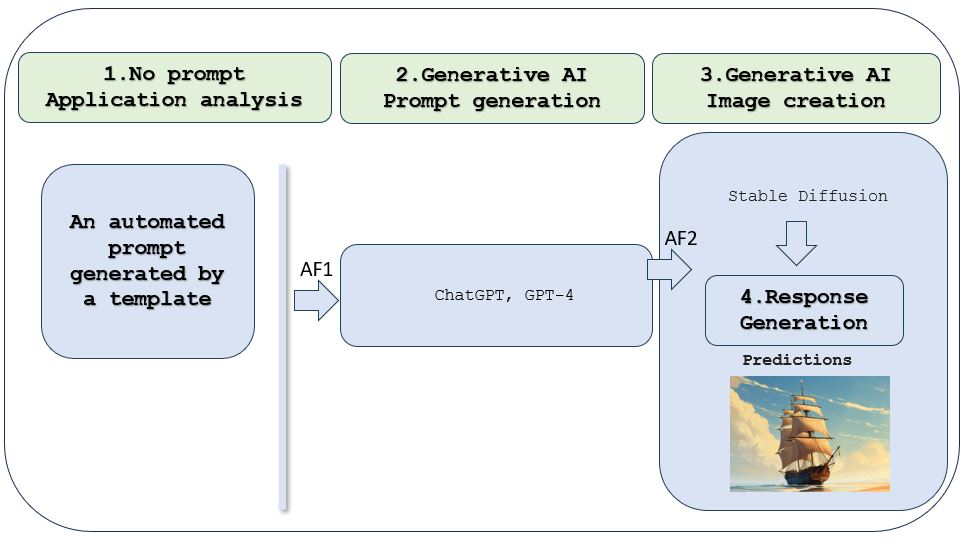

In [3]:
# @title
from IPython.display import Image     #This is used for rendering images in the notebook
from PIL import Image
image_path = "/content/chatgpt_stable_diffusion.jpg"
image = Image.open(image_path)
image

Activate  a GPU to run this notebook for Stable Diffusion.

Then check that the GPU is activated with the following instruction.

In [4]:
!nvidia-smi

Fri Jan 26 12:57:20 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# 1.Automated context preparation

## Retrieving context documents

The following context document could come from any source: emails, web, knowledge base, PDFs or any other source of information.

Classical administration tools can be used to store the documents.

The following code downloads a text to analyze it and automatically create prompts for Stable Diffusion.

In [5]:
!curl -L https://raw.githubusercontent.com/Denis2054/Transformers-for-NLP-and-Computer-Vision-3rd-Edition/main/Chapter20/ecodocument.txt --output "ecodocument.txt"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2130  100  2130    0     0   5534      0 --:--:-- --:--:-- --:--:--  5532


## Displaying a document for support

It is not necessary to display the document in production.
However, if there is a support request, it can be useful to check the input.

In [6]:
# Read the content of the file
with open("ecodocument.txt", "r") as f:
    content = f.read()

# Display content in HTML format
from IPython.core.display import display, HTML

display(HTML(f"""
<html>
<head>
    <title>Sustainable Fashion</title>
    <style>
        body {{ font-family: Arial, sans-serif; }}
        h1 {{ color: #2E8B57; }}
        p {{ text-align: justify; }}
    </style>
</head>
<body>
    <h1>Why Sustainable Fashion is Our Secret Weapon Against Climate Change</h1>
    <p>{content}</p>
</body>
</html>
"""))


## Automated preparation of instruction for GPT-4

This is a "no prompt" situation in which no human intervention is required in the process.

In [7]:
# Create a variable to store the text and add the content
input_text = "Summarize the following text in 5 lines from 1 to 5 that can be used as text-to-image prompts:" + content
print(input_text) # for support

Summarize the following text in 5 lines from 1 to 5 that can be used as text-to-image prompts:Why Sustainable Fashion is Our Secret Weapon Against Climate Change
Imagine a world where every clothing choice you make becomes a statement, not just of style, but of stewardship for our planet. Sounds empowering, right? That’s because sustainable fashion isn’t just a trend; it’s a revolution. And it’s one of the most potent tools we have to combat climate change.
Fashion’s Carbon Footprint : The global fashion industry accounts for about 10% of carbon emissions, more than all international flights and maritime shipping combined. Each time you select a sustainably produced garment, you’re slashing that carbon footprint.
Water Conservation : The traditional fashion industry consumes a staggering amount of water – it can take up to 2,700 liters of water to make a single cotton t-shirt! Choosing eco-friendly materials and methods can conserve our precious water resources.
Waste Reduction : Every

## Defining the dialog function (static)

In [8]:
 def dialog(uinput):
   #preparing the prompt for OpenAI
   role="user"

   line = {"role": role, "content": uinput}

   #creating the message
   assert1={"role": "system", "content": "You summarize a text in engaging lines that will be used as prompts"}
   assert2={"role": "assistant", "content": "Summarize the best ideas of a text in short lines from 1 to n"}
   assert3=line
   iprompt = []
   iprompt.append(assert1)
   iprompt.append(assert2)
   iprompt.append(assert3)

   #sending the message to ChatGPT
   client = OpenAI()
   response=client.chat.completions.create(model="gpt-4",messages=iprompt) #ChatGPT dialog
   text=response.choices[0].message.content #property of the response in dot notation

   return text

# 2.Automated Ideation with GPT-4
.




**Installing OpeanAI and Costs:**    
This notebook uses billable components of [OpenAI](https://openai.com/) for ChatGPT, GPT-4.

In [9]:
#Importing openai
try:
  import openai
  from openai import OpenAI
except:
  !pip install openai
  import openai
  from openai import OpenAI

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.1/225.1 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 9.3 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.
tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you have typing-extensions 4.9.0 which is incompatible.


In [10]:
#The OpenAI Key
f = open("drive/MyDrive/files/api_key.txt", "r")
API_KEY=f.readline()
f.close()

import os
os.environ['OPENAI_API_KEY'] =API_KEY
openai.api_key = os.getenv("OPENAI_API_KEY")

## Ideation

## generate text-to-image prompts

In [11]:
uinput=input_text
text=dialog(uinput) #preparing the messages for ChatGPT and making the request

In [12]:
text

'1. "Imagine a world where fashion choices become statements of earth stewardship, turning the tides in the climate change battle."\n2. "The sustainable sartorial revolution, slashing the fashion industry\'s carbon footprint and conserving our precious water resources."\n3. "Fashion to last: a modern movement reducing waste, recycling the old into new trends, and precluding ‘buy-discard-repeat’ cycles."\n4. "Wardrobe prowess preserving ecosystems, advocating ethical sourcing, and protecting biodiversity across the planet."\n5. "More than just style: ethical fashion empowering communities globally and shaping the world you want to live in through every sustainable piece you don."'

### Prompt output processing

Processing and saving the outputs for the text-to-image generation

In [13]:
# Splitting the string by \n to get a list of sentences
sentences = text.split("\n")

# Splitting the string by \n to get a list of sentences
sentences = [s.strip() for s in text.split("\n") if s]

# Removing the index and extra quotes from each sentence
cleaned_sentences = []
for sentence in sentences:
    parts = sentence.split('.')
    if len(parts) > 1:
        cleaned_sentences.append(parts[1][:-1])

# Writing the cleaned sentences to the file "image2text.txt"
with open("image2text.txt", "w") as file:
    for sentence in cleaned_sentences:
        file.write(sentence + '\n')

Support code to view the content if there is an issue

In [14]:
with open("image2text.txt", "r") as file:
    content = file.read()
    print(content)

 "Imagine a world where fashion choices become statements of earth stewardship, turning the tides in the climate change battl
 "The sustainable sartorial revolution, slashing the fashion industry's carbon footprint and conserving our precious water resource
 "Fashion to last: a modern movement reducing waste, recycling the old into new trends, and precluding ‘buy-discard-repeat’ cycle
 "Wardrobe prowess preserving ecosystems, advocating ethical sourcing, and protecting biodiversity across the plane
 "More than just style: ethical fashion empowering communities globally and shaping the world you want to live in through every sustainable piece you do



The following code is for Google Drive usage for a project. You can save the prompts for further use without running the Ideation again.

In [15]:
!cp image2text.txt  "drive/MyDrive/files/image2text.txt"

# 3.Image Creation with Stable Diffusion

Next, you should install `diffusers` as well `scipy`, `ftfy` and `transformers`. `accelerate` is used to achieve much faster loading.

In [16]:
!pip install diffusers==0.11.1 -qq
!pip install transformers scipy ftfy accelerate -qq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.9/524.9 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.9/270.9 kB 9.6 MB/s eta 0:00:00


## Stable Diffusion Pipeline

`StableDiffusionPipeline` is an end-to-end inference pipeline that you can use to generate images from text with just a few lines of code.


In [17]:
import torch
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16)

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

text_encoder/pytorch_model.fp16.safetensors not found


Fetching 30 files:   0%|          | 0/30 [00:00<?, ?it/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

pytorch_model.fp16.bin:   0%|          | 0.00/608M [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/608M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/492M [00:00<?, ?B/s]

pytorch_model.fp16.bin:   0%|          | 0.00/246M [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.bin:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

diffusion_pytorch_model.non_ema.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

(…)fusion_pytorch_model.non_ema.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
The config attributes {'scaling_factor': 0.18215} were passed to AutoencoderKL, but are not expected and will be ignored. Please verify your config.json configuration file.


Moving the pipeline to GPU to have faster inference.

In [18]:
pipe = pipe.to("cuda")

## Retrieving the ideation outputs

Retrieving Ideation prompts inferred by Google Vertex AI PaLM 2 for text2image prompt creation

The following code is for Google Drive usage for a project

In [19]:
!cp "drive/MyDrive/files/image2text.txt" image2text.txt

## Create a text-to-image function

In [20]:
def text2image(prompt):
  image=pipe(prompt).images[0]
  return image

## Generating images



In [21]:
from IPython.display import Image, display

# Path of the Ideation file containing text prompts
with open("image2text.txt", "r") as f:
    lines = f.readlines()
    line_count = len(lines)
    print("Number of lines", line_count)

Number of lines 5


  0%|          | 0/50 [00:00<?, ?it/s]

"Imagine a world where fashion choices become statements of earth stewardship, turning the tides in the climate change battl


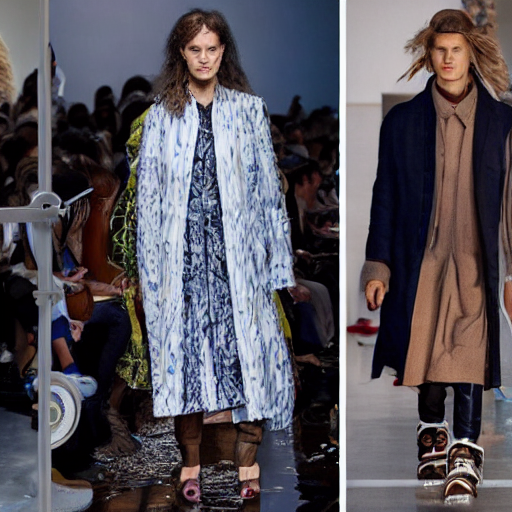

  0%|          | 0/50 [00:00<?, ?it/s]

"The sustainable sartorial revolution, slashing the fashion industry's carbon footprint and conserving our precious water resource


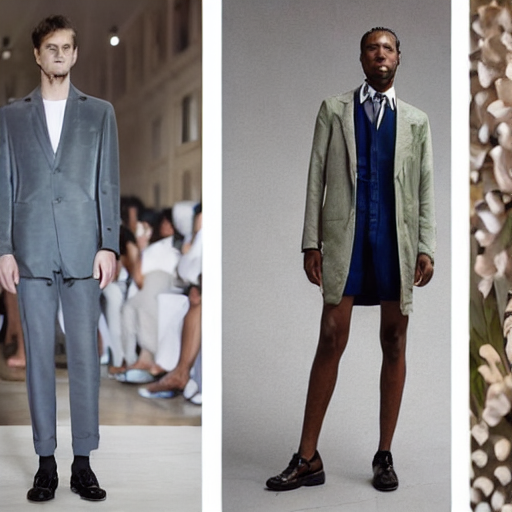

  0%|          | 0/50 [00:00<?, ?it/s]

"Fashion to last: a modern movement reducing waste, recycling the old into new trends, and precluding ‘buy-discard-repeat’ cycle


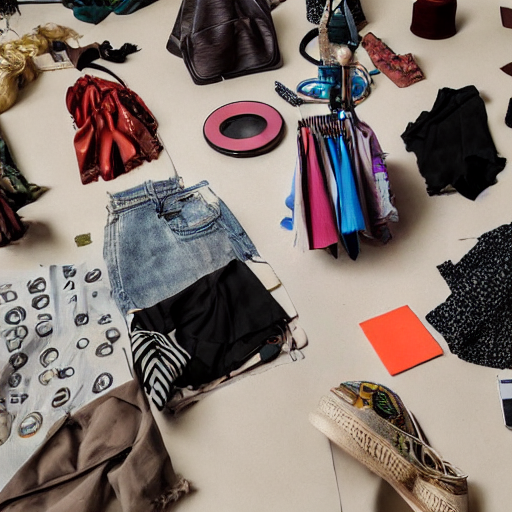

  0%|          | 0/50 [00:00<?, ?it/s]

"Wardrobe prowess preserving ecosystems, advocating ethical sourcing, and protecting biodiversity across the plane


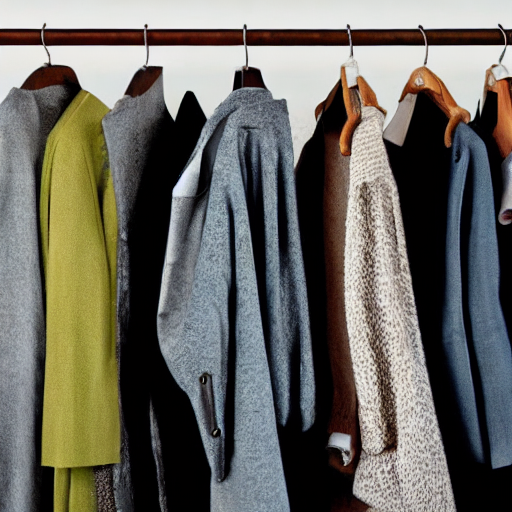

  0%|          | 0/50 [00:00<?, ?it/s]

"More than just style: ethical fashion empowering communities globally and shaping the world you want to live in through every sustainable piece you do


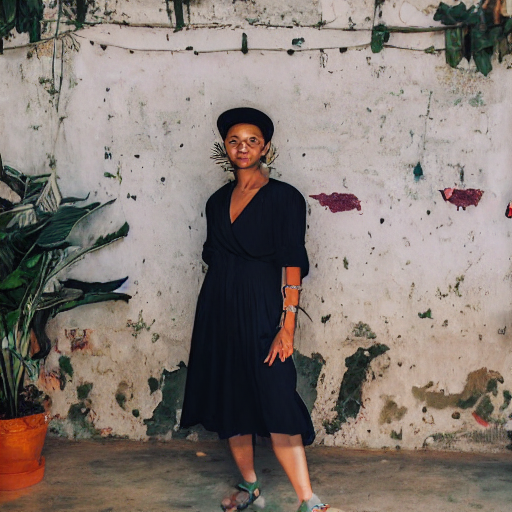

number of images 5


In [22]:
import re
i=0
for line in lines:
    prompt = line.strip()
    prompt = re.sub(r"\d+\. ","", prompt)
    Image = text2image(prompt)
    i+=1
    print(prompt)
    display(Image)

print("number of images", i)